# Final Project Template 

## 1) Get your data
You may use any data set(s) you like, so long as they meet these criteria:

* Your data must be publically available for free.
* Your data should be interesting to _you_. You want your final project to be something you're proud of.
* Your data should be "big enough":
    - It should have at least 1,000 rows.
    - It should have enough of columns to be interesting.
    - If you have questions, contact a member of the instructional team.

## 2) Provide a link to your data
Your data is required to be free and open to anyone.
As such, you should have a URL which anyone can use to download your data:

Provides census data for all tracks 

The Diabetes Dataset can be found here for download at this link.

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

## 3) Import your data
In the space below, import your data.
If your data span multiple files, read them all in.
If applicable, merge or append them as needed.

#read in the happiness spreadsheet 

In [1]:
diabetes= "diabetes.csv"

In [2]:
import pandas as pd
import sklearn
import numpy as np 

In [3]:
#use pandas to read in the data files since its csv
diabetes_df= pd.read_csv(diabetes, sep=',', header=0)

## 4) Show me the head of your data.

In [4]:
#show the head for the diabetes dataset

diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 5) Show me the shape of your data

In [41]:
#show the shpe of the dataset
print(diabetes_df.shape)

(2000, 9)


## 6) Show me the proportion of missing observations for each column of your data

In [42]:
#show the mssing observations in each column of the happiness dataset 
diabetes_df.dropna().isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [43]:
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## 7) Give me a problem statement.
Below, write a problem statement. Keep in mind that your task is to tease out relationships in your data and eventually build a predictive model. Your problem statement can be vague, but you should have a goal in mind. Your problem statement should be between one sentence and one paragraph.

## 7) Initial data explortion of the breast cancer data 

### Based on the given factors can we predict if an individual has a disposition to develop diabetes??

In [5]:
#load in the necesary packages 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler,label_binarize
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import StratifiedKFold, ShuffleSplit, learning_curve, cross_val_score, KFold, GridSearchCV,train_test_split
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression

## Lets take a general look at the data to see if there are any apparent trends in the dataset

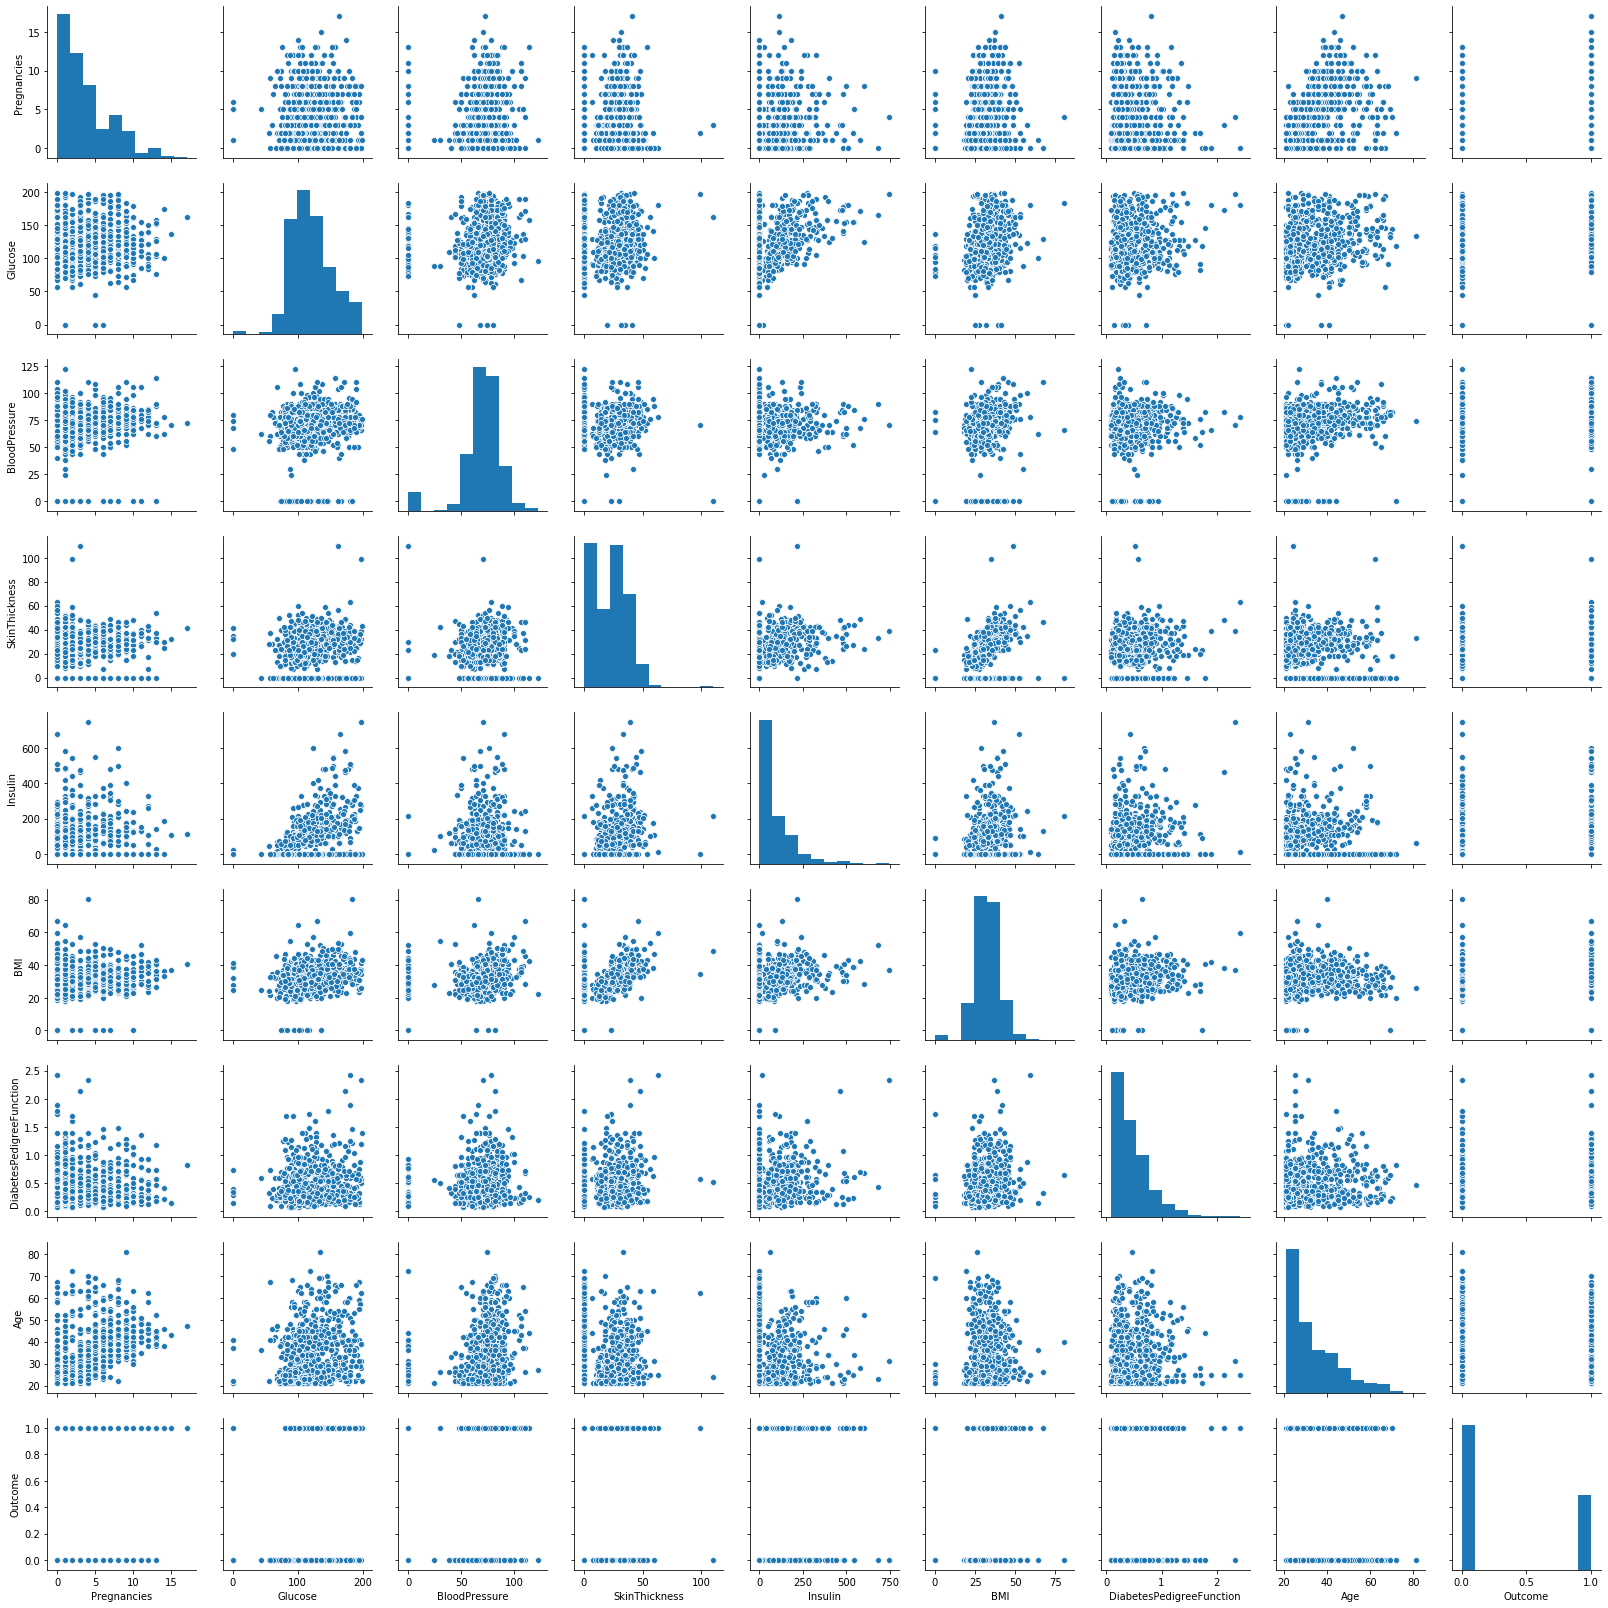

In [54]:
sns.pairplot(diabetes_df)

In [9]:
#use the seaborn dataset to visualize the relationships
import seaborn as sns

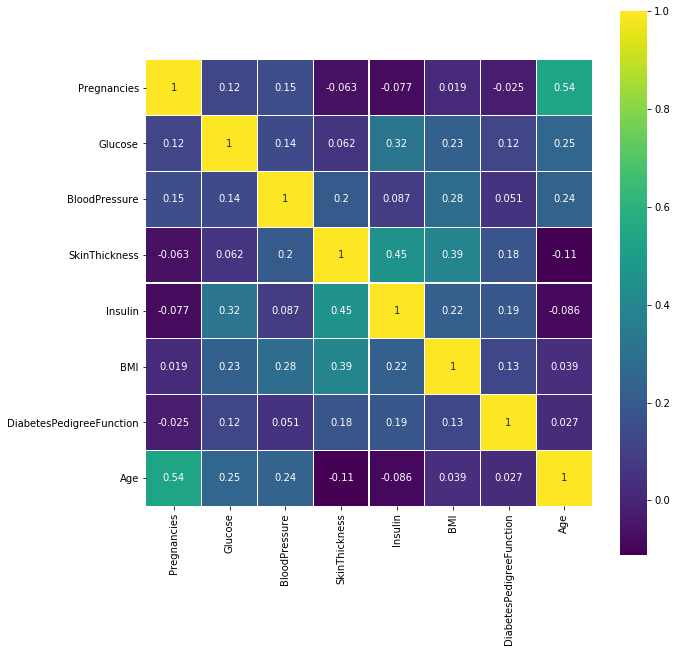

In [20]:
#heatmap indicating the correlatioin between outcome and the other factors  
colormap= plt.cm.viridis
plt.figure(figsize= (10,10))
sns.heatmap(diabetes_df.astype(float).drop(axis=1, labels='Outcome').corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

In [6]:
#assign all the columsn except for the outcome to the data matrix
X= diabetes_df.drop('Outcome', axis=1)
#assign the outcome to the target matrix for predictions 
y= diabetes_df['Outcome']

# Lets use the train test split method to effectively split our data 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Pairwise distances:


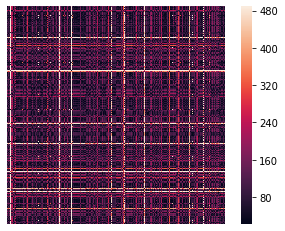

In [10]:
#look at the shape of X
D = sklearn.metrics.pairwise_distances(X, metric='euclidean', n_jobs=-1)
print("Pairwise distances:")
sns.heatmap(D, robust=True, square=True, yticklabels=False, xticklabels=False, cbar=True)
plt.show()


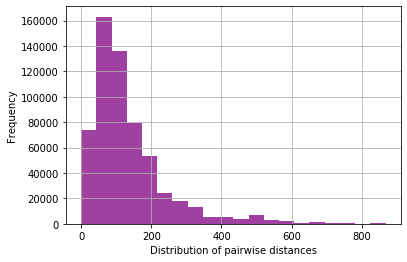

In [11]:
#can we see if this is parametric data
plt.hist(np.hstack(D), 20, facecolor='purple', alpha=0.75)
plt.xlabel('Distribution of pairwise distances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

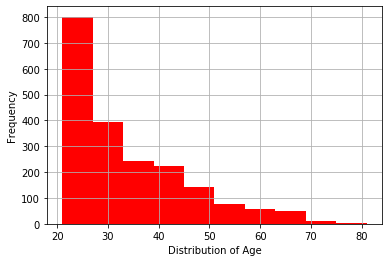

In [14]:
#plot the correlation between Age
plt.hist(diabetes_df["Age"], facecolor= 'red')
plt.xlabel('Distribution of Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

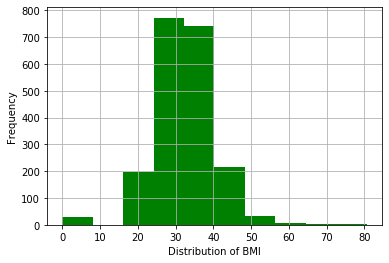

In [30]:
#plot the correlation between BMI
plt.hist(diabetes_df["BMI"], facecolor= 'green')
plt.xlabel('Distribution of BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [13]:
#train test split function

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.3, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="neg_mean_squared_error")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()


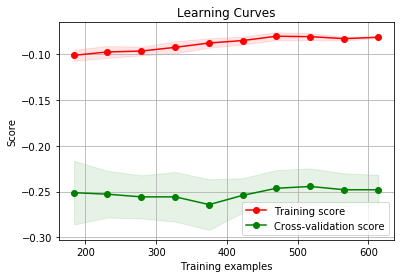

In [14]:
title = "Learning Curves"

# Create the CV iterator
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)
#model = LinearRegression()
model = KNeighborsRegressor(n_neighbors=2)
plot_learning_curve(model, title, X, y, cv=cv_iterator, n_jobs=4)
#if we change neighbors to 1- the training set is good but 
plt.show()

## Based on the above results doesn't seem the training set is doing a good job of representing our data

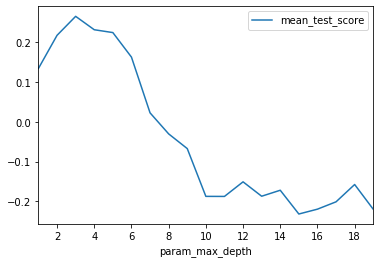

In [15]:
#if we use a grid search method do we have better results? 
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
# Create kf instance 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Create dt instance 
dt = DecisionTreeRegressor()
# Create grid search instance 
#gscv = GridSearchCV(dt, {"max_depth": range(1, 200)}, cv=kf, n_jobs=-1)#we don't wanna grow the tree this much 
gscv = GridSearchCV(dt, {"max_depth": range(1, 20)}, cv=kf, n_jobs=-1)
gscv.fit(X_scaled, y)
# Get cross-validation data
cv_df = pd.DataFrame(gscv.cv_results_)
# Get k values versus mean_test_scores
cv_df.plot.line(x="param_max_depth", y="mean_test_score");

In [17]:
gscv.best_params_

{'max_depth': 3}

In [18]:
#make predictions based on the new values
gscv.best_estimator_ #make predictions on the new values 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [22]:
#establish a linear regression model 
#can we predict the outcome?
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
lr_regr = linear_model.LinearRegression()
#fit the training data
lr_regr.fit(X_train, y_train)

#make predictions with these testing sites
#using the linear regression model 
pred_diabetes=lr_regr.predict(X_test)
score= lr_regr.score(X_test, y_test)

In [24]:

print('LRr_Coefficients: ', lr_regr.coef_)
print('LR_Mean Square Error: %.2f' % mean_squared_error(y_test, pred_diabetes))
print('LR_Variance score: %.2f' % r2_score(y_test, pred_diabetes))
print('Score: %.2f' % lr_regr.score(X_test, y_test))

LRr_Coefficients:  [ 0.00902342  0.00587649 -0.0016825  -0.0001061  -0.00013602  0.01609013
  0.06402086  0.00624109]
LR_Mean Square Error: 0.17
LR_Variance score: 0.22
Score: 0.22


In [25]:
m1 = LinearRegression(fit_intercept=True)
m1.fit(X_train, y_train)
m1_train_predicted = m1.predict(X_train)
m1_test_predicted = m1.predict(X_test)



In [26]:
mean_squared_error(y_train, m1_train_predicted)

0.15441607484617959

In [27]:
mean_squared_error(y_test, m1_test_predicted)

0.17492306676986524

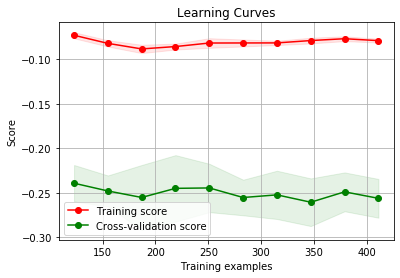

In [33]:
title = "Learning Curves"

# Create the CV iterator
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)
#model = LinearRegression()
model = KNeighborsRegressor(n_neighbors=2)
plot_learning_curve(model, title, X_train, y_train, cv=cv_iterator, n_jobs=4)
#if we change neighbors to 1- the training set is good but 
plt.show()

Looks like this model is dong even wors now with the linear regression model 

In [40]:
from sklearn.ensemble import RandomForestRegressor

predicted_outcome= RandomForestRegressor(n_estimators=3).fit(X_train, y_train).predict(X_test)
mean_squared_error(y_test, predicted_outcome)

0.2436570428696413

In [42]:
from sklearn.tree import DecisionTreeRegressor

predicted_outcome= DecisionTreeRegressor().fit(X_train, y_train).predict(X_test)
mean_squared_error(y_test, predicted_outcome)

0.2874015748031496

In [44]:
# KNN Regression(K=1)

predicted_outcome = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train).predict(X_test)
mean_squared_error(y_test, predicted_outcome)


0.22922134733158359

In [45]:
# Linear Regression

predicted_outcome = LinearRegression().fit(X_train, y_train).predict(X_test)
mean_squared_error(y_test, predicted_outcome)

0.17492306676986524

0.26766204411452654

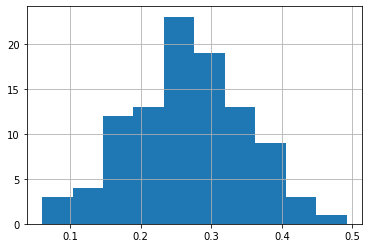

In [49]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

reg = LinearRegression()
cv = ShuffleSplit(n_splits=100, test_size=0.1, random_state=0)

# here we try to maximize the score, that is why neg_mean_squared_error
# essentially, score = - cost_function
s = cross_val_score(reg, X, y, cv=cv)
pd.Series(s).hist()
s.mean() # R^2

In [59]:
def plot_kmeans(diabetes_df, cluster_labels, model, k):
    """Plot the clusters and centroids for a model trained on the Iris dataset."""
    # Scatter plots of each species
    for cluster_idx in range(k):
        plt.scatter(
            diabetes_df.iloc[cluster_labels == cluster_idx, 0],
            diabetes_df.iloc[cluster_labels == cluster_idx, 1],
            label="Cluster #{}".format(cluster_idx),
        )
    plt.legend()
    #plt.scatter(original_data[cluster_labels == 1, 0], original_data[cluster_labels == 1, 1], s = 100, c = 'blue', label = 'Species 1')

    # Add centroids to plot
    plt.scatter(
        model.cluster_centers_[:, 0],
        model.cluster_centers_[:, 1],
        s=100,
        c='red',
    )

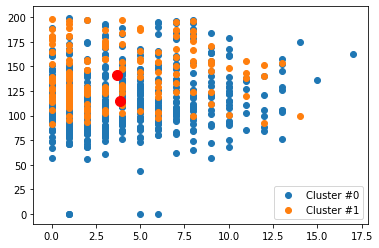

In [60]:
from sklearn.cluster import KMeans
model = KMeans(
    n_clusters=2,
    init="k-means++", #'k-means++', # default, also: random
    n_init=100, # default, also: 20, 5, 1
    max_iter=100, # default / 1
)
model.fit(diabetes_df)
cluster_labels = model.predict(diabetes_df)
plot_kmeans(diabetes_df, cluster_labels, model, 2)

There are no distinct clusters so it seems consistent with the overall data as well as the relative inconsistency with the different models. 

## 8) What is your _y_-variable?
For final project, you will need to perform a statistical model. This means you will have to accurately predict some y-variable for some combination of x-variables. From your problem statement in part 7, what is that y-variable?

Based on the above models it seems that the y variable in the outcome or the lilihood that a factor is related to having diabetes

The best model based off the score and the mean squared error seems to be 